In [1]:
%matplotlib inline

from cosima_cookbook import build_index, get_nc_variable, memory
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

starting distributed client...
<Client: scheduler='tcp://127.0.0.1:39370' processes=8 cores=8>


In [2]:
build_index()

Searching /g/data3/hh5/tmp/cosima/
Searching /g/data1/v45/APE-MOM
Found 38641 .nc files
Using database sqlite:////g/data1/v45/cosima-cookbook/cosima-cookbook.db
Files already indexed: 38232
Files found but not yet indexed: 409
Indexing new .nc files...

Found 0 new variables
Saving results in database...
Indexing complete.


True

In [3]:
# selected 025 experiments
expts = ['mom025_nyf','mom025_nyf_salt','mom025_jra_ryf8485',
         'mom025_jra_ryf9091','mom025_jra_ryf0304','mom025_jra_ryf9091_saltunderice']
print(expts)

['mom025_nyf', 'mom025_nyf_salt', 'mom025_jra_ryf8485', 'mom025_jra_ryf9091', 'mom025_jra_ryf0304', 'mom025_jra_ryf9091_saltunderice']


In [4]:
expt = expts[0]

In [5]:
sea_level=get_nc_variable(expt,'ocean_month.nc','sea_level', time_units='days since 1900-01-01')

Using 100 ncfiles
chunking info ('time', 'yt_ocean', 'xt_ocean') [1, 540, 720]


In [6]:
sea_level

<xarray.DataArray 'sea_level' (time: 1200, yt_ocean: 1080, xt_ocean: 1440)>
dask.array<concatenate, shape=(1200, 1080, 1440), dtype=float64, chunksize=(1, 540, 720)>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 -279.1 -278.9 -278.6 ...
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 -80.76 -80.65 -80.55 ...
  * time      (time) datetime64[ns] 1900-01-16T12:00:00 1900-02-15 ...
Attributes:
    long_name:      effective sea level (eta_t + patm/(rho0*g)) on T cells
    units:          meter
    valid_range:    [-1000.  1000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_surface_height_above_geoid

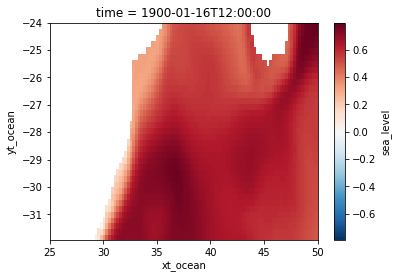

In [7]:
sea_level.isel(time=0).sel(xt_ocean=slice(25,50,None),yt_ocean=slice(-32,-24,None)).plot()

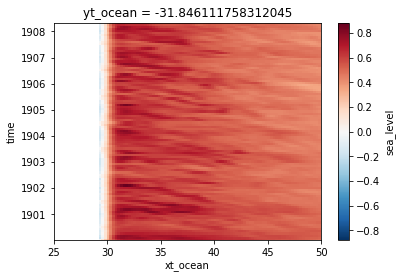

In [8]:
sea_level.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                           yt_ocean=slice(-32,-24,None)).isel(yt_ocean=0).plot()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


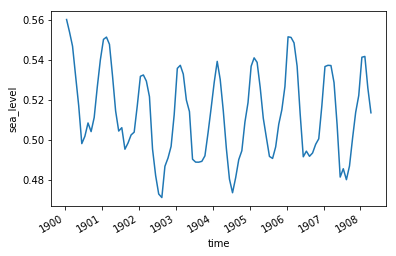

In [9]:
sea_level.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                           yt_ocean=slice(-32,-24,None)).mean('yt_ocean').mean('xt_ocean').plot()

Using 100 ncfiles
chunking info ('time', 'yu_ocean', 'xu_ocean') [1, 540, 720]


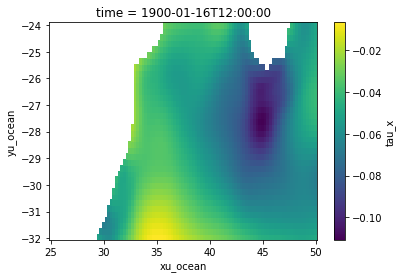

In [10]:
tau_x=get_nc_variable(expt,'ocean_month.nc','tau_x', time_units='days since 1900-01-01')
tau_x.isel(time=0).sel(xu_ocean=slice(25,50,None),yu_ocean=slice(-32,-24,None)).plot()

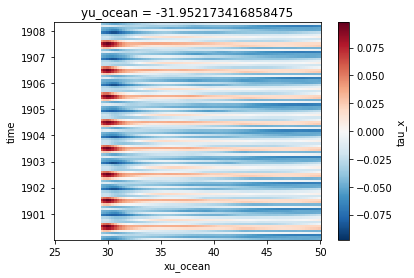

In [11]:
tau_x.isel(time=slice(0,100,None)).sel(xu_ocean=slice(25,50,None),
                                           yu_ocean=slice(-32,-24,None)).isel(yu_ocean=0).plot()

In [12]:
tau_x

<xarray.DataArray 'tau_x' (time: 1200, yu_ocean: 1080, xu_ocean: 1440)>
dask.array<concatenate, shape=(1200, 1080, 1440), dtype=float64, chunksize=(1, 540, 720)>
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 -278.8 -278.5 ...
  * yu_ocean  (yu_ocean) float64 -81.02 -80.92 -80.81 -80.71 -80.6 -80.5 ...
  * time      (time) datetime64[ns] 1900-01-16T12:00:00 1900-02-15 ...
Attributes:
    long_name:      i-directed wind stress forcing u-velocity
    units:          N/m^2
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_c
    standard_name:  surface_downward_x_stress

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


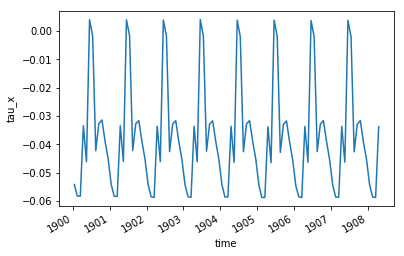

In [13]:
tau_x.isel(time=slice(0,100,None)).sel(xu_ocean=slice(25,50,None),
                                           yu_ocean=slice(-32,-24,None)).mean('yu_ocean').mean('xu_ocean').plot()

Using 100 ncfiles
chunking info ('time', 'yu_ocean', 'xu_ocean') [1, 540, 720]


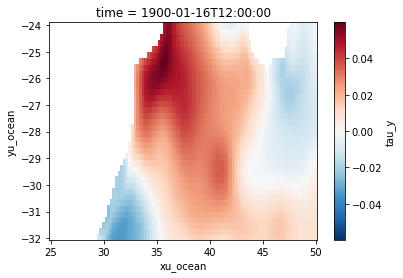

In [52]:
tau_y=get_nc_variable(expt,'ocean_month.nc','tau_y', time_units='days since 1900-01-01')
tau_y.isel(time=0).sel(xu_ocean=slice(25,50,None),yu_ocean=slice(-32,-24,None)).plot()

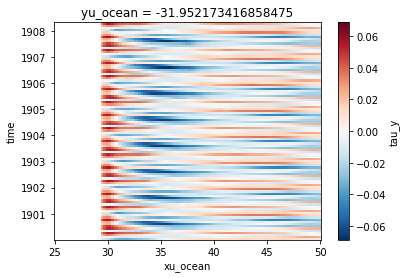

In [53]:
tau_y.isel(time=slice(0,100,None)).sel(xu_ocean=slice(25,50,None),
                                           yu_ocean=slice(-32,-24,None)).isel(yu_ocean=0).plot()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


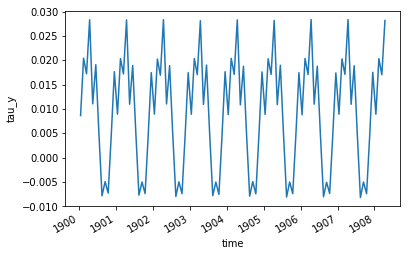

In [54]:
tau_y.isel(time=slice(0,100,None)).sel(xu_ocean=slice(25,50,None),
                                           yu_ocean=slice(-32,-24,None)).mean('yu_ocean').mean('xu_ocean').plot()

Using 100 ncfiles
chunking info ('time', 'yt_ocean', 'xt_ocean') [1, 540, 720]


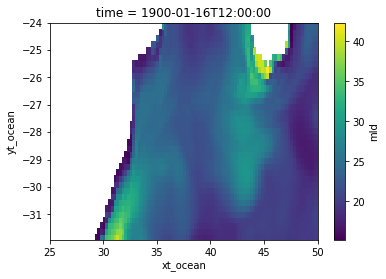

In [14]:
mld=get_nc_variable(expt,'ocean_month.nc','mld', time_units='days since 1900-01-01')
mld.isel(time=0).sel(xt_ocean=slice(25,50,None),yt_ocean=slice(-32,-24,None)).plot()

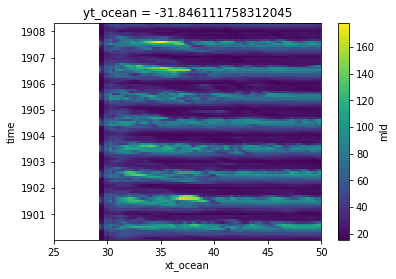

In [15]:
mld.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                           yt_ocean=slice(-32,-24,None)).isel(yt_ocean=0).plot()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


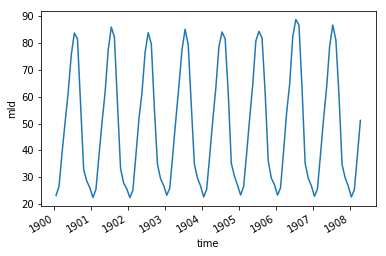

In [16]:
mld.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                           yt_ocean=slice(-32,-24,None)).mean('yt_ocean').mean('xt_ocean').plot()

Using 100 ncfiles
chunking info ('time', 'yt_ocean', 'xt_ocean') [1, 540, 720]


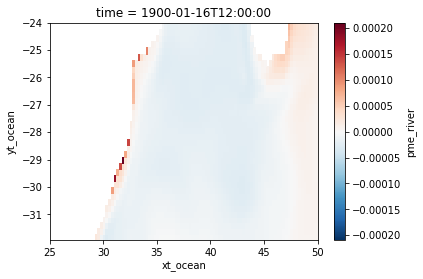

In [17]:
pme_river=get_nc_variable(expt,'ocean_month.nc','pme_river', time_units='days since 1900-01-01')
pme_river.isel(time=0).sel(xt_ocean=slice(25,50,None),yt_ocean=slice(-32,-24,None)).plot()


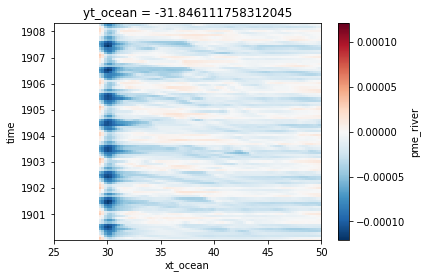

In [18]:
pme_river.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                           yt_ocean=slice(-32,-24,None)).isel(yt_ocean=0).plot()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


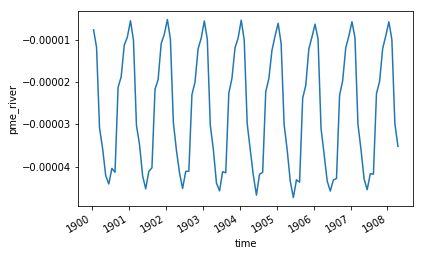

In [19]:
pme_river.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                           yt_ocean=slice(-32,-24,None)).mean('yt_ocean').mean('xt_ocean').plot()

Using 100 ncfiles
chunking info ('time', 'yt_ocean', 'xt_ocean') [1, 540, 720]


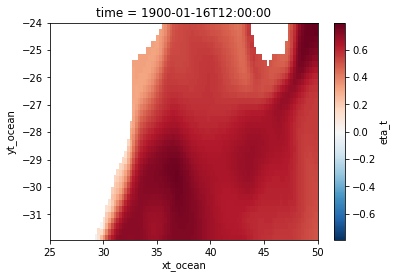

In [20]:
eta_t=get_nc_variable(expt,'ocean_month.nc','eta_t', time_units='days since 1900-01-01')
eta_t.isel(time=0).sel(xt_ocean=slice(25,50,None),yt_ocean=slice(-32,-24,None)).plot()


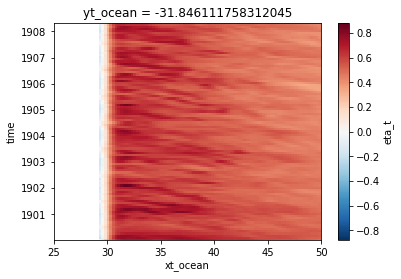

In [21]:
eta_t.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                           yt_ocean=slice(-32,-24,None)).isel(yt_ocean=0).plot()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


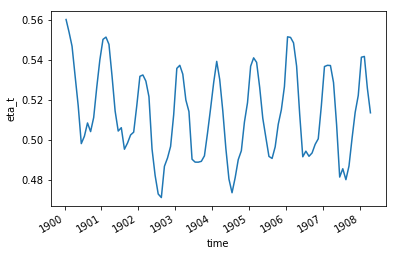

In [22]:
eta_t.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                        yt_ocean=slice(-32,-24,None)).mean('yt_ocean').mean('xt_ocean').plot()

Using 100 ncfiles
chunking info ('time', 'yt_ocean', 'xt_ocean') [1, 540, 720]


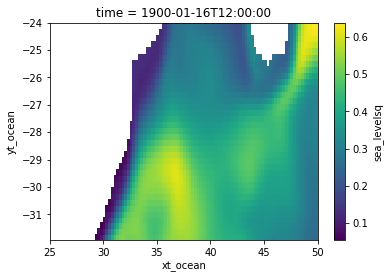

In [23]:
sea_levelsq=get_nc_variable(expt,'ocean_month.nc','sea_levelsq', time_units='days since 1900-01-01')
sea_levelsq.isel(time=0).sel(xt_ocean=slice(25,50,None),yt_ocean=slice(-32,-24,None)).plot()


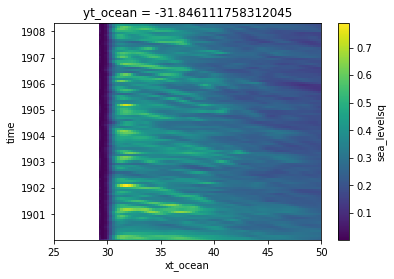

In [24]:
sea_levelsq.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                           yt_ocean=slice(-32,-24,None)).isel(yt_ocean=0).plot()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


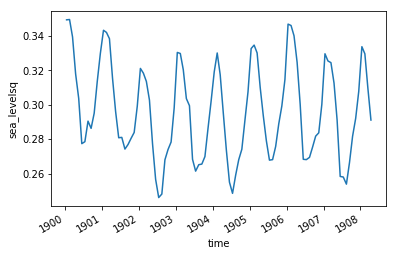

In [25]:
sea_levelsq.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                        yt_ocean=slice(-32,-24,None)).mean('yt_ocean').mean('xt_ocean').plot()

Using 100 ncfiles
chunking info ('time', 'yt_ocean', 'xt_ocean') [1, 540, 720]


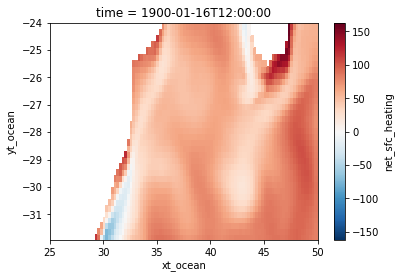

In [26]:
net_sfc_heating=get_nc_variable(expt,'ocean_month.nc','net_sfc_heating', time_units='days since 1900-01-01')
net_sfc_heating.isel(time=0).sel(xt_ocean=slice(25,50,None),yt_ocean=slice(-32,-24,None)).plot()

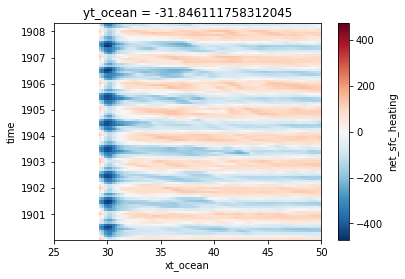

In [27]:
net_sfc_heating.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                           yt_ocean=slice(-32,-24,None)).isel(yt_ocean=0).plot()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


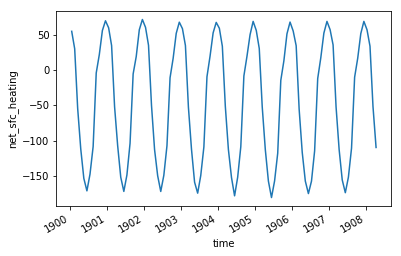

In [28]:
net_sfc_heating.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                        yt_ocean=slice(-32,-24,None)).mean('yt_ocean').mean('xt_ocean').plot()

In [32]:
sfc_salt_flux_restoring=get_nc_variable(expt,'ocean_month.nc','sfc_salt_flux_restoring', 
                                        time_units='days since 1900-01-01')
sfc_salt_flux_restoring.isel(time=0).sel(xt_ocean=slice(25,50,None),yt_ocean=slice(-32,-24,None)).plot()

Using 0 ncfiles


IndexError: list index out of range

In [31]:
bmf_v=get_nc_variable(expt,'ocean_month.nc','bmf_v', time_units='days since 1900-01-01')

Using 0 ncfiles


IndexError: list index out of range

In [29]:
bmf_v.isel(time=0).sel(xu_ocean=slice(25,50,None),yu_ocean=slice(-32,-24,None)).plot()

Using 0 ncfiles


IndexError: list index out of range

In [35]:
tx_trans_int_z=get_nc_variable(expt,'ocean_month.nc','tx_trans_int_z', 
                                        time_units='days since 1900-01-01')

Using 100 ncfiles
chunking info ('time', 'yt_ocean', 'xu_ocean') [1, 540, 720]


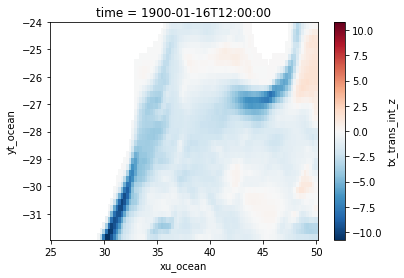

In [37]:
tx_trans_int_z.isel(time=0).sel(xu_ocean=slice(25,50,None),yt_ocean=slice(-32,-24,None)).plot()

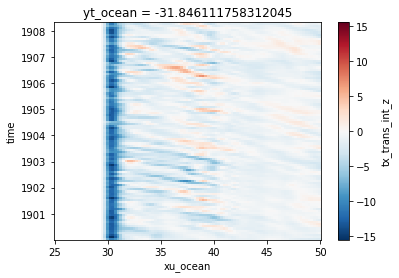

In [38]:
tx_trans_int_z.isel(time=slice(0,100,None)).sel(xu_ocean=slice(25,50,None),
                                           yt_ocean=slice(-32,-24,None)).isel(yt_ocean=0).plot()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


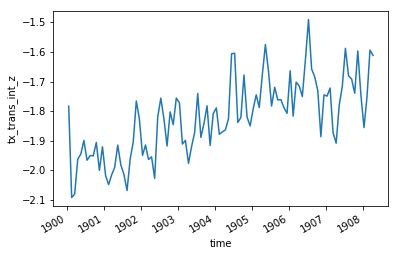

In [39]:
tx_trans_int_z.isel(time=slice(0,100,None)).sel(xu_ocean=slice(25,50,None),
                                        yt_ocean=slice(-32,-24,None)).mean('yt_ocean').mean('xu_ocean').plot()

In [44]:
ty_trans_int_z=get_nc_variable(expt,'ocean_month.nc','ty_trans_int_z', 
                                        time_units='days since 1900-01-01')

Using 100 ncfiles
chunking info ('time', 'yu_ocean', 'xt_ocean') [1, 540, 720]


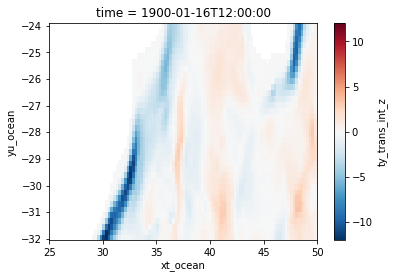

In [45]:
ty_trans_int_z.isel(time=0).sel(xt_ocean=slice(25,50,None),yu_ocean=slice(-32,-24,None)).plot()

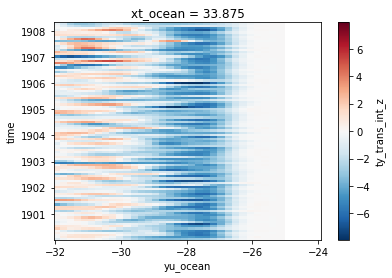

In [47]:
ty_trans_int_z.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                           yu_ocean=slice(-32,-24,None)).isel(xt_ocean=35).plot()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


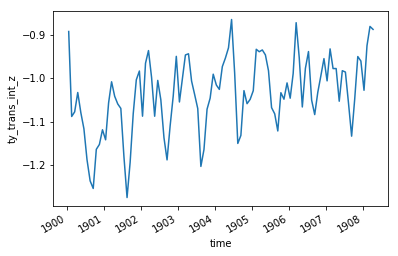

In [48]:
ty_trans_int_z.isel(time=slice(0,100,None)).sel(xt_ocean=slice(25,50,None),
                                        yu_ocean=slice(-32,-24,None)).mean('yu_ocean').mean('xt_ocean').plot()

In [51]:
pbot_t=get_nc_variable(expt,'ocean_month.nc','pbot_t', 
                                        time_units='days since 1900-01-01')

Using 0 ncfiles


IndexError: list index out of range